In [28]:
import tensorflow as tf
import os
from IPython.display import display
from PIL import Image



In [29]:
train_normal_dir = os.path.join(r'C:\Users\Shanay\Desktop\Pneumonia-Detection\pneumonia dataset\chest_xray\train\NORMAL')
train_pneumonia_dir = os.path.join(r'C:\Users\Shanay\Desktop\Pneumonia-Detection\pneumonia dataset\chest_xray\train\PNEUMONIA')

validation_normal_dir = os.path.join(r'C:\Users\Shanay\Desktop\Pneumonia-Detection\pneumonia dataset\chest_xray\test\NORMAL')
validation_pneumonia_dir = os.path.join(r'C:\Users\Shanay\Desktop\Pneumonia-Detection\pneumonia dataset\chest_xray\test\PNEUMONIA')

In [31]:
train_normal_images = os.listdir(train_normal_dir)

train_pneumonia_images = os.listdir(train_pneumonia_dir)

validation_normal_images = os.listdir(validation_normal_dir)

validation_pneumonia_images = os.listdir(validation_pneumonia_dir)

# train_normal_images = train_normal_images.reshape(300,300,3)
# train_normal_images = np.array(train_normal_images).reshape(300,300)
print(len(train_normal_images))
print(len(train_pneumonia_images))
print(len(validation_normal_images))
print(len(validation_pneumonia_images))


1341
3875
234
390


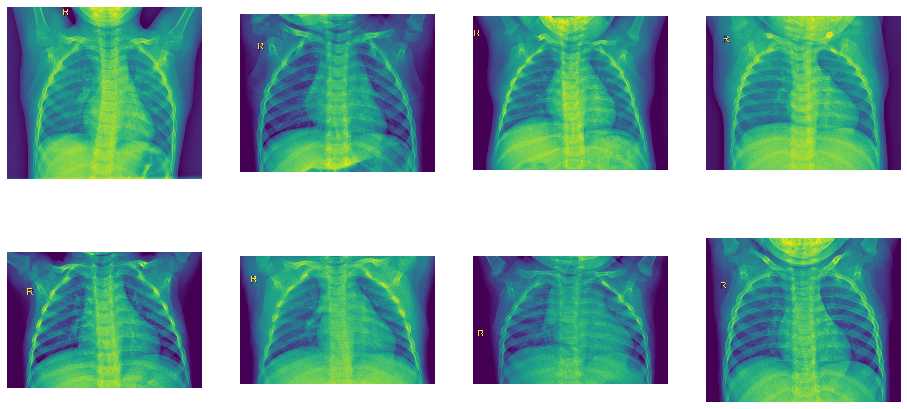

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0


fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_images[pic_index-8:pic_index]]
# next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname) 
#                 for fname in train_pneumonia_images[pic_index-8:pic_index]]

for i, img_path in enumerate(next_normal_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
#     print(img.shape)
    plt.imshow(img)

plt.show()

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])


model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives()])



In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range = 0.2, horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
        r'C:\Users\Shanay\Desktop\Pneumonia-Detection\pneumonia dataset\chest_xray\train',
        target_size = (64,64),
        batch_size = 32,
        class_mode = 'binary'
    
)


# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)


validation_generator = validation_datagen.flow_from_directory(
        r'C:\Users\Shanay\Desktop\Pneumonia-Detection\pneumonia dataset\chest_xray\test',
        target_size = (64,64),
        batch_size = 16,
        class_mode = 'binary'
    
)




Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [53]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 4, 4, 64)        

model.summary()

In [54]:
cnn_model = model.fit_generator(train_generator,
                         steps_per_epoch = int(5216/32),
                         epochs = 25,
                         validation_data = validation_generator,
                         validation_steps = int(624/16))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 163 steps, validate for 39 steps
Epoch 1/25
163/163 [==============================] - 88s 543ms/step - loss: 0.4567 - accuracy: 0.7893 - true_positives_1: 3727.0000 - true_negatives: 390.0000 - false_positives_2: 951.0000 - false_negatives: 148.0000 - val_loss: 0.3088 - val_accuracy: 0.8526 - val_true_positives_1: 351.0000 - val_true_negatives: 181.0000 - val_false_positives_2: 53.0000 - val_false_negatives: 39.0000
Epoch 2/25
163/163 [==============================] - 86s 526ms/step - loss: 0.2618 - accuracy: 0.8901 - true_positives_1: 3633.0000 - true_negatives: 1010.0000 - false_positives_2: 331.0000 - false_negatives: 242.0000 - val_loss: 0.3641 - val_accuracy: 0.8542 - val_true_positives_1: 316.0000 - val_true_negatives: 217.0000 - val_false_positives_2: 17.0000 - val_false_negatives: 74.0000
Epoch 3/25
163/163 [==============================] - 88s 539ms/step - loss: 0.2269 - accuracy: 0.9030 - true_positives_1: 3657.00

In [38]:
import numpy as np
import sklearn.metrics as metrics
test_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)

predictions = model.predict_generator(validation_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)


true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
conf = metrics.confusion_matrix(true_classes, predicted_classes)
print(report)  
print(conf)

              precision    recall  f1-score   support

      NORMAL       0.38      1.00      0.55       234
   PNEUMONIA       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624

[[234   0]
 [390   0]]
